# Integración de ecuaciones hidrostaticas en RG y Newton

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const

## Newtonian

In [3]:
# Constants and parameters
G = const.G.value
M = const.M_sun.value
R = const.R_sun.value
c = const.c.value
rho_0 = 1.5e5
P_0 = 2.5e16

k = 1
gamma = 2

a = rho_0*R**3/M
b = rho_0/P_0*M/R
l = M/R
mu = rho_0**gamma/P_0*k

In [4]:
# Define the ODEs
def NewtOdes(x, r, gamma):
    a = rho_0*R**3/M
    b = rho_0/P_0*M/R
    l = M/R
    mu = rho_0**gamma/P_0*k


    # Variables
    rho, m, phi = x

    # ODEs
    # drho_dr = -b/mu/gamma * G*rho**(2-gamma)*m/r**2
    # dm_dr = 4*np.pi*a*r**2*rho
    # dphi_dr = l*G/c**2*m/r**2
    drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
    dm_dr = r**2*rho
    dphi_dr = m/r**2

    return [drho_dr, dm_dr, dphi_dr]

In [82]:
# integration range
rf = 100.0
#NN = 1000
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int((rf)/dx)
r = np.linspace(dx, rf, NN)

# initial conditions
rho_0 = 1.0
m_0 = 0
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# solve ODE
x = odeint(NewtOdes, x_0, r, args=(3,))

R=3.37100 rho=0.01198


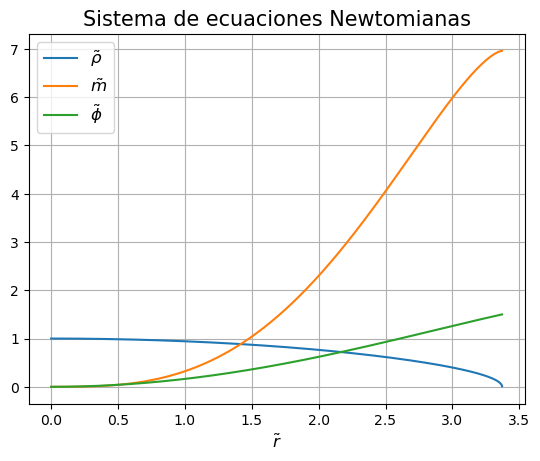

In [83]:
# search the x where rho = 0
lim = len(r)
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        # print(r[i], x[i,0])
        lim = i
        break

# print(r[lim], x[lim,0])
print('R={:.5f} rho={:.5f}'.format(r[lim-1], x[lim-1,0]))

# plot
plt.plot(r[:lim], x[:lim,0], label=r'$\tilde{\rho}$')
plt.plot(r[:lim], x[:lim,1], label=r'$\tilde{m}$')
plt.plot(r[:lim], x[:lim,2], label=r'$\tilde{\phi}$')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Sistema de ecuaciones Newtomianas', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [93]:
# considerig different gamma
gammas = np.arange(0.8, 1.7, 0.1)
xi = [odeint(NewtOdes, x_0, r, args=(i,)) for i in gammas]

C:\Users\nicom\AppData\Local\Temp\ipykernel_5812\2869603266.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2


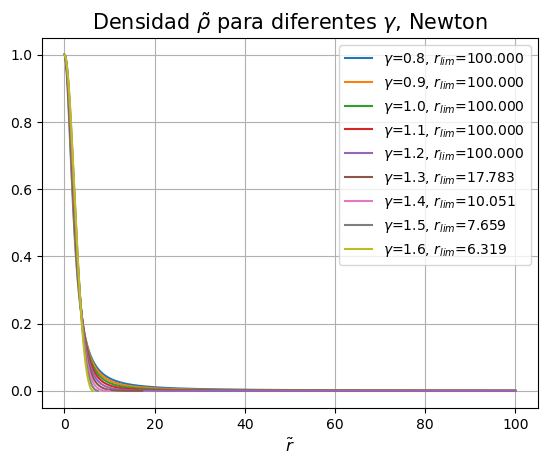

In [105]:
# plot for different gamma
for i in range(len(xi)):
    # search the x where rho = 0
    lim_ = len(r)
    for j in range(len(xi[i][:,0])):
        if xi[i][j,0] <= 0:
            lim_ = j
            break

    # plt.plot(r, xi[i][:,0], label='$\gamma$={}, $r_{{lim}}$={}'.format(gammas[i], r[lim_-1]))
    plt.plot(r[:lim_], xi[i][:lim_,0], label='$\gamma$={:.1f}, $r_{{lim}}$={:.3f}'.format(gammas[i], r[lim_-1])) # plot til limit
    # plt.plot(r[lim_-1], xi[i][lim_-1,0], 'o')# plot last point
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Densidad $\\tilde{\\rho}$ para diferentes $\\gamma$, Newton', fontsize=15)
plt.legend()
plt.grid()
plt.show()

## Relativistic

In [97]:
# Define the ODEs
def RelOdes(x, r, gamma):
    # a = 4*np.pi*rho_0*R**3/M
    # d = P_0/c**2/rho_0
    # l = G/c**2*M/R
    # mu = rho_0**gamma/P_0*k

    # Variables
    rho, m, phi = x

    # ODEs
    # drho_dr = -l/d/mu/gamma * rho**(2-gamma)*m/r**2 * (1 + mu*d*rho**(gamma-1)) * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    # dm_dr = a*r**2*rho
    # dphi_dr = l*m/r**2 * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + rho**(gamma-1)) * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
    dm_dr = r**2*rho
    dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
    return [drho_dr, dm_dr, dphi_dr]

In [98]:
# integration range
rf = 100.0
#NN = 1000
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int(rf/dx)
r = np.linspace(dx, rf, NN)

# initial conditions
rho_0 = 1.0
m_0 = 4*np.pi/3*(dx)**3*rho_0
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# solve ODE
x = odeint(RelOdes, x_0, r, args=(2.3,)) #Por qué se hace rho = nan (¿0?) tan de repente? 

C:\Users\nicom\AppData\Local\Temp\ipykernel_5812\4195557597.py:15: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + rho**(gamma-1)) * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
C:\Users\nicom\AppData\Local\Temp\ipykernel_5812\4195557597.py:17: RuntimeWarning: invalid value encountered in scalar power
  dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


R=1.79100 rho=nan


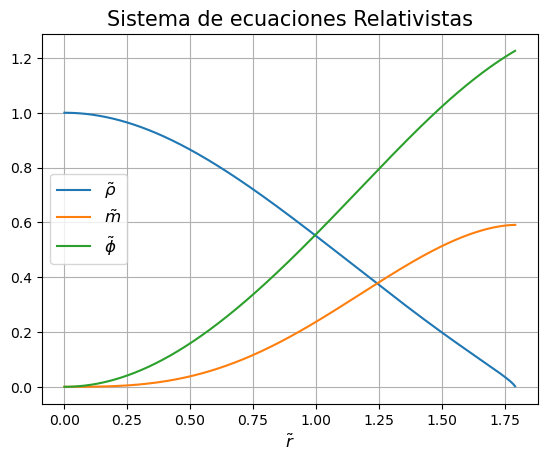

In [100]:
# search the x where rho = 0
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        # print(r[i], x[i,0])
        lim = i
        break

# print(r[lim], x[lim,0])
print('R={:.5f} rho={:.5f}'.format(r[lim-1], x[lim-1,0]))

# plot
plt.plot(r[:lim], x[:lim,0], label=r'$\tilde{\rho}$')
plt.plot(r[:lim], x[:lim,1], label=r'$\tilde{m}$')
plt.plot(r[:lim], x[:lim,2], label=r'$\tilde{\phi}$')

# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Sistema de ecuaciones Relativistas', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [108]:
# considerig different gamma
gammas = np.arange(0.8, 1.7, 0.1)
xi = [odeint(RelOdes, x_0, r, args=(i,)) for i in gammas]

C:\Users\nicom\AppData\Local\Temp\ipykernel_5812\4195557597.py:15: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + rho**(gamma-1)) * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
C:\Users\nicom\AppData\Local\Temp\ipykernel_5812\4195557597.py:17: RuntimeWarning: invalid value encountered in scalar power
  dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)


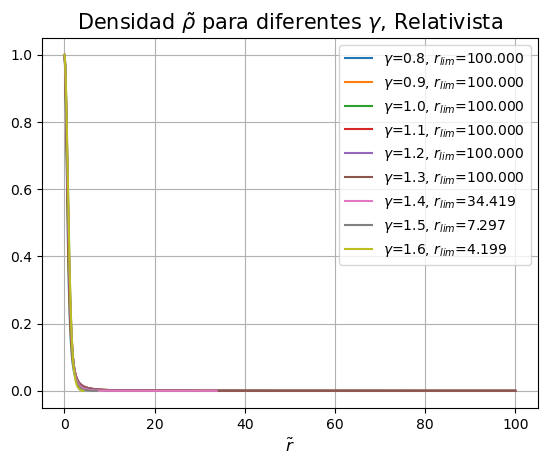

In [109]:
# plot for different gamma
for i in range(len(xi)):
    # search the x where rho = 0
    lim_ = len(r)
    for j in range(len(xi[i][:,0])):
        if xi[i][j,0] <= 0:
            lim_ = j
            break

    # plt.plot(r, xi[i][:,0], label='$\gamma$={}, $r_{{lim}}$={}'.format(gammas[i], r[lim_-1]))
    plt.plot(r[:lim_], xi[i][:lim_,0], label='$\gamma$={:.1f}, $r_{{lim}}$={:.3f}'.format(gammas[i], r[lim_-1])) # plot til limit
    # plt.plot(r[lim_-1], xi[i][lim_-1,0], 'o')# plot last point
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Densidad $\\tilde{\\rho}$ para diferentes $\\gamma$, Relativista', fontsize=15)
plt.legend()
plt.grid()
plt.show()